In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor


plt.style.use('ggplot')

In [5]:
df = pd.read_csv("/kaggle/input/agrofood-co2-emission/Agrofood_co2_emission.csv")

In [6]:
y_2019 = df.loc[df["Year"]==2019]
kt_2019 =y_2019["total_emission"].sum()
gt_2019 = round(kt_2019 / 1_000_000,2) # the amount of gigatones of CO2
perc = gt_2019 / 30
print(f"The amount of CO2 from agrifood in 2019 is {gt_2019} gigatones (gt), that is:",round(perc * 100), "%","of total emissions!")

The amount of CO2 from agrifood in 2019 is 18.56 gigatones (gt), that is: 62 % of total emissions!


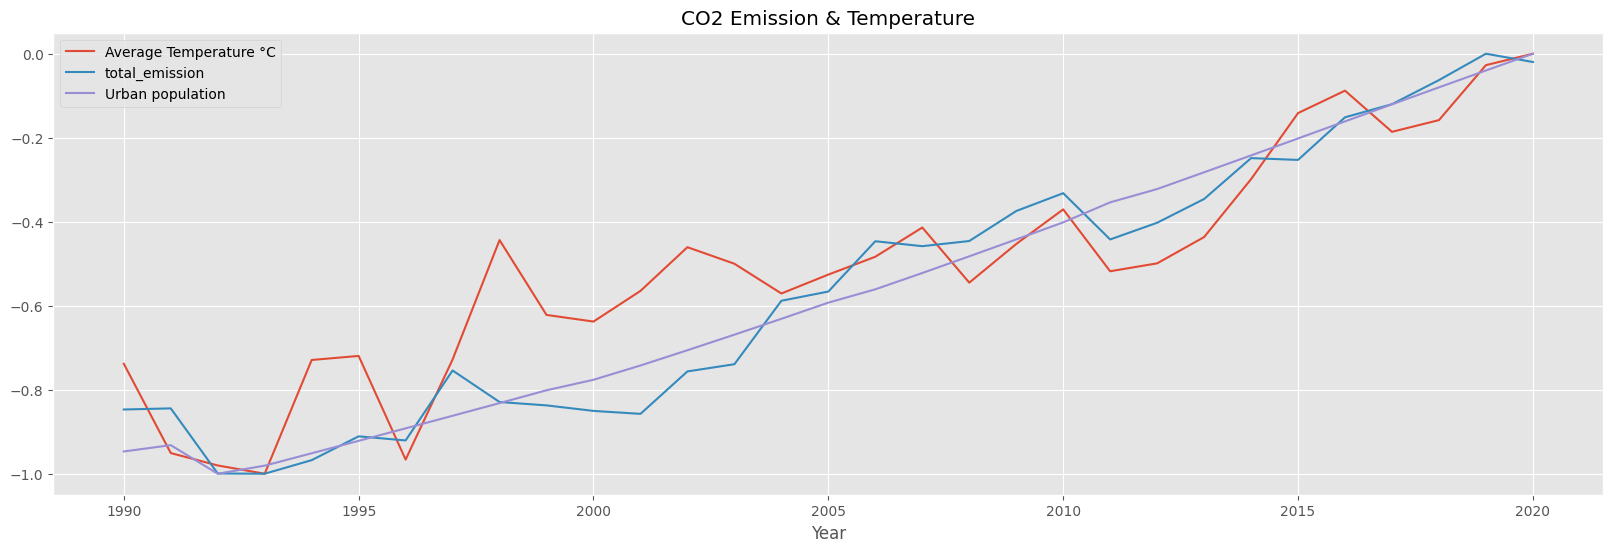

In [7]:
def normalizer(df):
    norm = (df - df.max()) / (df.max() - df.min())
    return norm

temp_emission = df.groupby("Year").agg({"Average Temperature °C": "mean", "total_emission": "mean", "Urban population": "mean"})
norm_temp = normalizer(temp_emission)


norm_temp.plot(figsize=(20, 6))
plt.title("CO2 Emission & Temperature")
plt.show()

In [8]:
def plot_co2_trend(nation):
    ita = df.loc[df.Area == nation]
    ita = ita.set_index("Year")
    plt.figure(figsize=(12,6))
    ita["total_emission"].plot(kind = "line", color = "green")
    plt.title(f"{nation} CO2 trend")
    plt.show()

In [14]:
fig = px.box(df, x="Year",
             y="Average Temperature °C",
             color="Year",
             color_discrete_sequence=px.colors.sequential.Viridis,
             title='<b>Average temperature distribution by years')
fig.show()

In [10]:
df["pop_tot"] = df["Total Population - Male"] + df["Total Population - Female"]

In [11]:
continent_mapping = {
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Côte d\'Ivoire', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'São Tomé and Príncipe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
    'Asia': ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'],
    'Europe': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City'],
    'North America': ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States'],
    'Oceania': ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'],
    'South America': ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
}

#This function assign a continent label to each country in the df
def assign_continent(country):
    for continent, countries in continent_mapping.items():
        if country in countries:
            return continent
    return None

df["continent"] = df["Area"].apply(assign_continent)

In [12]:
px.scatter(df, df["Average Temperature °C"],
           df["total_emission"], 
           size= "pop_tot", 
           title = "<b>CO2 Emission & Temperature - population", 
           template="plotly_dark", 
           color ="continent")


In [13]:
correlation = df.groupby(["Year"]).agg({"total_emission":"sum", "Average Temperature °C":"mean", "pop_tot":"sum"})
correlation.corr()

,total_emission,Average Temperature °C,pop_tot
total_emission,1.000000,0.90552,0.981828
Average Temperature °C,0.905520,1.00000,0.912050
pop_tot,0.981828,0.91205,1.000000


In [15]:
px.scatter(correlation.reset_index(),    
    x = "total_emission", 
    y = "Average Temperature °C", 
    size = "pop_tot",
    color = "Year", 
    title = "<br> Temperature & CO2 Emissions - global relation",
    template="plotly_dark")

In [16]:
fig = px.scatter_3d(df.groupby(["continent","Year"])\
                    .agg({"total_emission":"sum", 
                          "Average Temperature °C":"mean", 
                          "pop_tot":"sum"}).reset_index(),
                          z = "total_emission", 
                          y = "Average Temperature °C", 
                          x = "Year",
                          color="continent",
                          size = "pop_tot",
                           title = "<br> Temperature & CO2 Emissions - per Continent and Year")
fig.show()


In [17]:
!pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 54.5 MB/s eta 0:00:0000:0100:01


In [18]:
import pycountry
# we need a iso for plotting the emission around the globe
def get_iso_alpha(country_name):
    try:
        country = pycountry.countries.get(name=country_name)
        iso_alpha = country.alpha_3
        return iso_alpha
    except:
        return None

def plot_global(df, year):
    year_df = df.loc[df["Year"] == year].copy()
    year_df["iso_alpha"] = year_df["Area"].apply(get_iso_alpha)
    
    # Normalize the emission in range 0-100 becouse of neg values non plottable
    year_df["total_emission_norm"] = (year_df["total_emission"] - year_df["total_emission"].min()) / (year_df["total_emission"].max() - year_df["total_emission"].min()) * 100

    fig = px.scatter_geo(year_df, locations="iso_alpha", 
                        color="continent",
                        hover_name="Area", 
                        size="total_emission_norm"
                        )
    
    fig.update_layout(title={'text': f"<br> Agrifood CO2 emission by {year}", 'x': 0.455, 'xanchor': 'center'})     
    fig.update_layout(
    title={'text': f"<br> Agrifood CO2 emission by {year}", 'x': 0.5, 'xanchor': 'center'},
    autosize=False,  
    height=600,      
    width=1200       
)

    fig.show()

plot_global(df, year=2020)

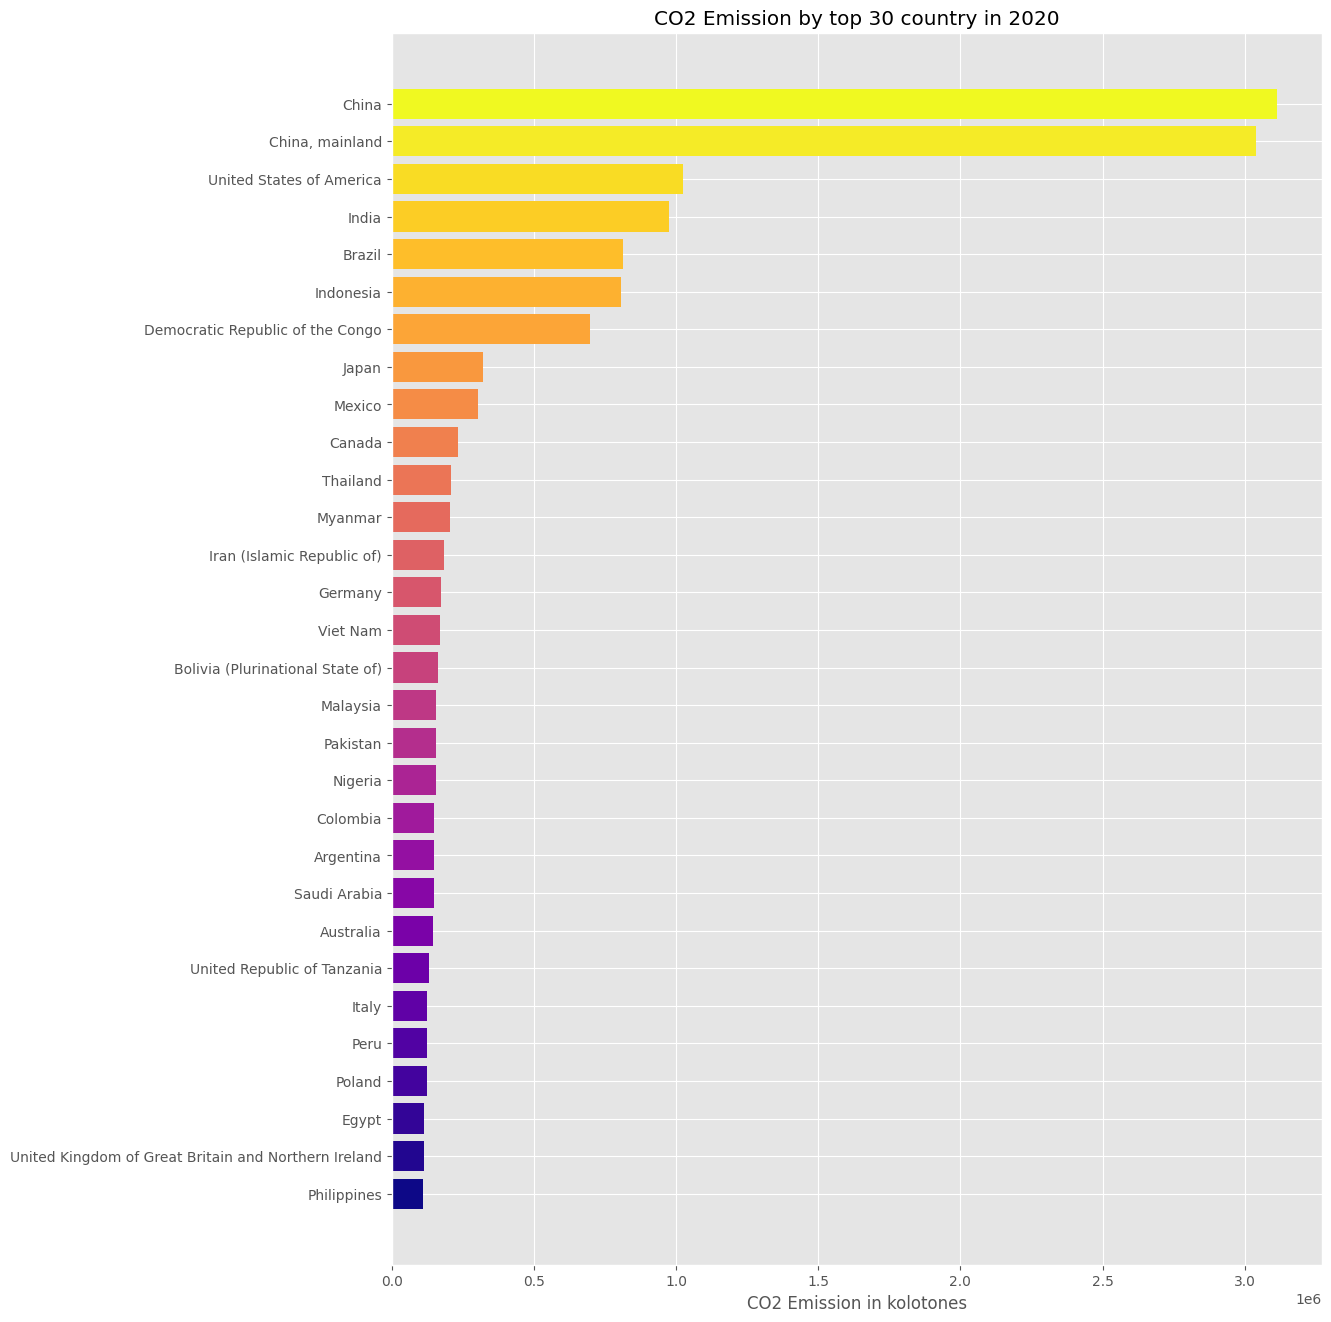

In [20]:
def country_emission(df,year, length = 30):
        df = df.copy()
        plot = df.loc[df["Year"]==year]
        plot = plot.sort_values(by = "total_emission", ascending = True).tail(length)
        colors = plt.colormaps.get_cmap('plasma').resampled(len(plot))
        plt.figure(figsize=(12, 16))
        plt.barh(plot['Area'], 
                plot['total_emission'], 
                color=colors(range(len(plot))))
        plt.title(f'CO2 Emission by top {length} country in {year}')
        plt.xlabel('CO2 Emission in kolotones')

        plt.show()

country_emission(df, year=2020)

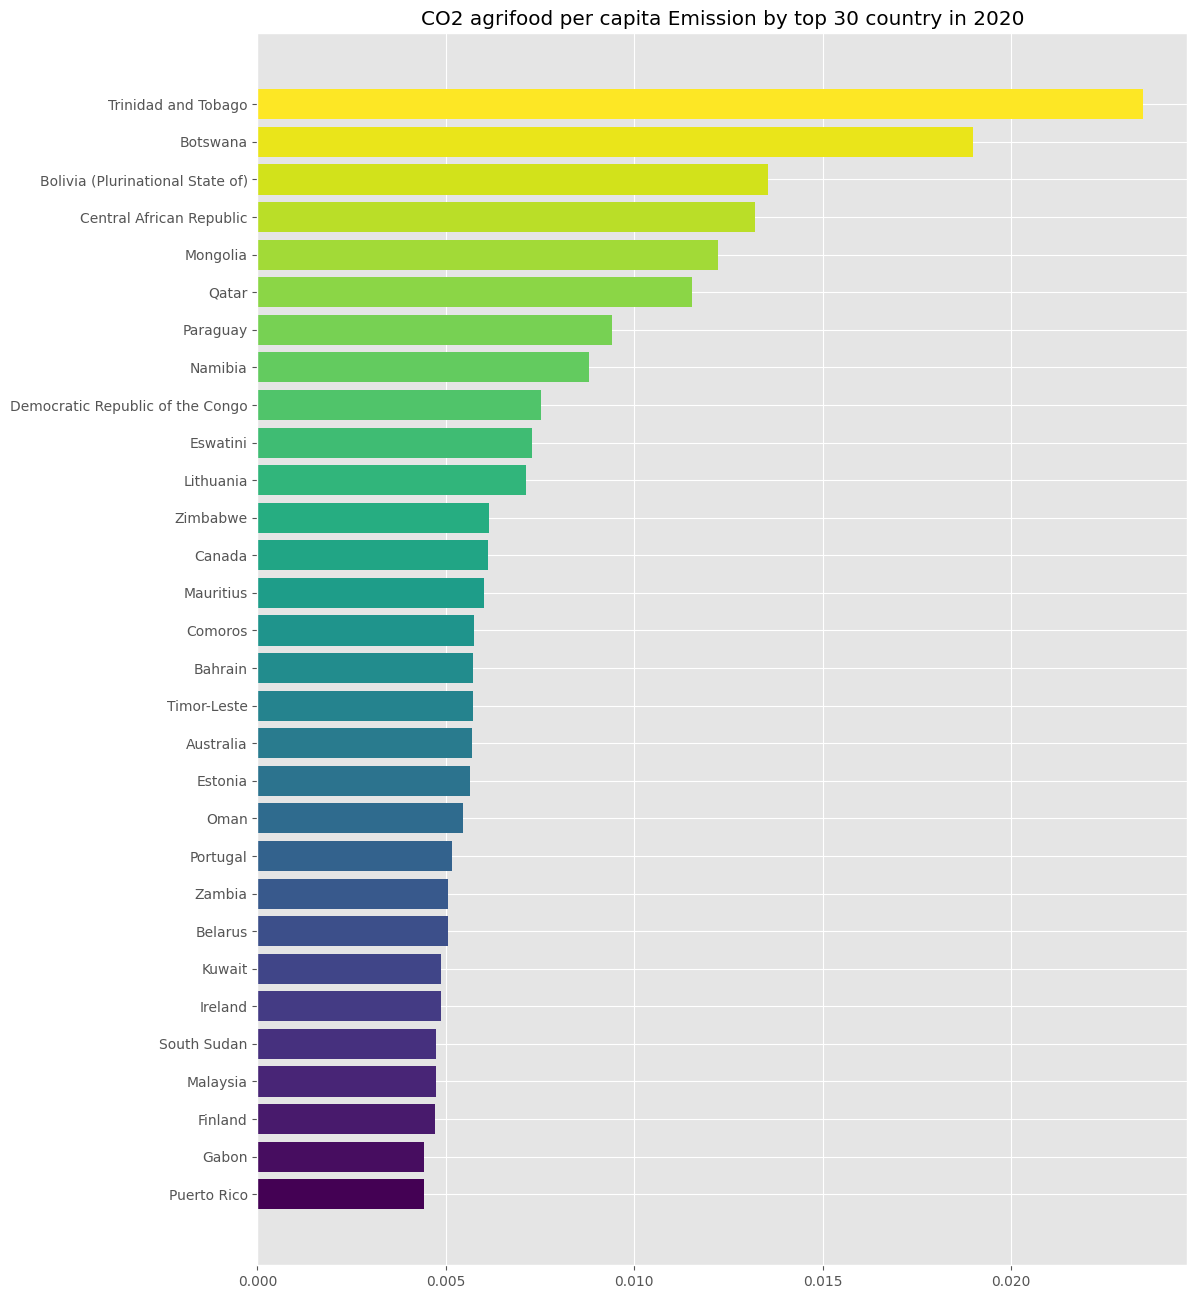

In [23]:
# let's create a feature with co2 per capita compsuntion in kilotones
df["per_capita_emission_kt"] = df["total_emission"] / df["pop_tot"] 

def percapita_emission(df,year, length = 30):
        df = df.copy()
        # let's remove small island or counties ehit this filter
        plot = df.loc[(df["Year"]==year) & (df["pop_tot"] > 800000)]
        plot = plot.sort_values(by = "per_capita_emission_kt", ascending = True).tail(length)
        colors = plt.colormaps.get_cmap('viridis').resampled(len(plot))
        plt.figure(figsize=(12, 16))
        plt.barh(plot['Area'], 
                plot['per_capita_emission_kt'], 
                color=colors(range(len(plot))))
        plt.title(f'CO2 agrifood per capita Emission by top {length} country in {year}')
        plt.show()

percapita_emission(df, year=2020, length=30)

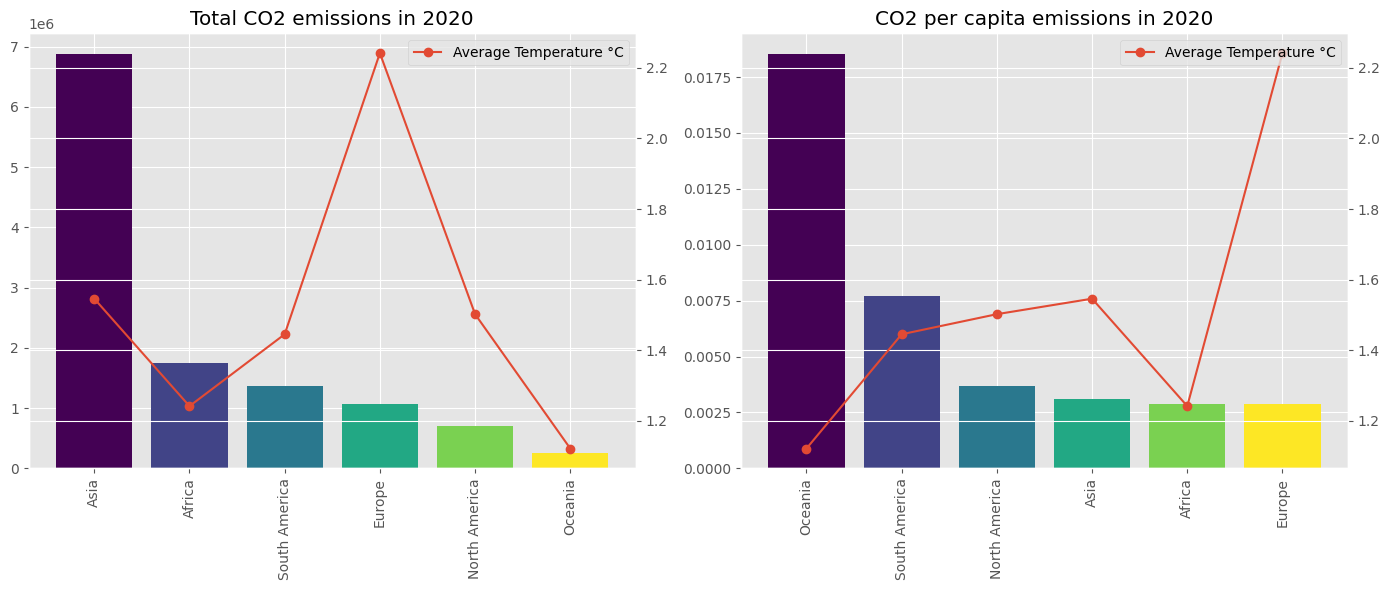

In [25]:
def continental_emission(year=2020):

    continent_df = df.loc[(df.pop_tot > 500000) & (df.Year == year)] \
        .groupby("continent") \
        .agg({
            "total_emission": "sum",
            "Average Temperature °C": "median",
            "per_capita_emission_kt": "mean"
        }).reset_index()

    continent_df = continent_df.sort_values(by="total_emission", ascending=False)

    # Correct colormap length
    colors = plt.colormaps.get_cmap('viridis').resampled(len(continent_df))

    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # ----- Total Emission Plot -----
    ax[0].bar(continent_df["continent"],
              continent_df["total_emission"],
              color=colors(range(len(continent_df))))

    ax[0].set_title(f"Total CO2 emissions in {year}")

    ax2 = ax[0].twinx()
    ax2.plot(continent_df["continent"],
             continent_df["Average Temperature °C"],
             marker='o')

    ax2.legend(["Average Temperature °C"], loc='upper right')


    # ----- Per Capita Plot -----
    continent_df = continent_df.sort_values(by="per_capita_emission_kt", ascending=False)

    ax[1].bar(continent_df["continent"],
              continent_df["per_capita_emission_kt"],
              color=colors(range(len(continent_df))))

    ax[1].set_title(f"CO2 per capita emissions in {year}")

    ax3 = ax[1].twinx()
    ax3.plot(continent_df["continent"],
             continent_df["Average Temperature °C"],
             marker='o')

    ax3.legend(["Average Temperature °C"], loc='upper right')


    # ✅ Proper tick rotation (No Warning)
    for axis in ax:
        axis.tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()


continental_emission(2020)


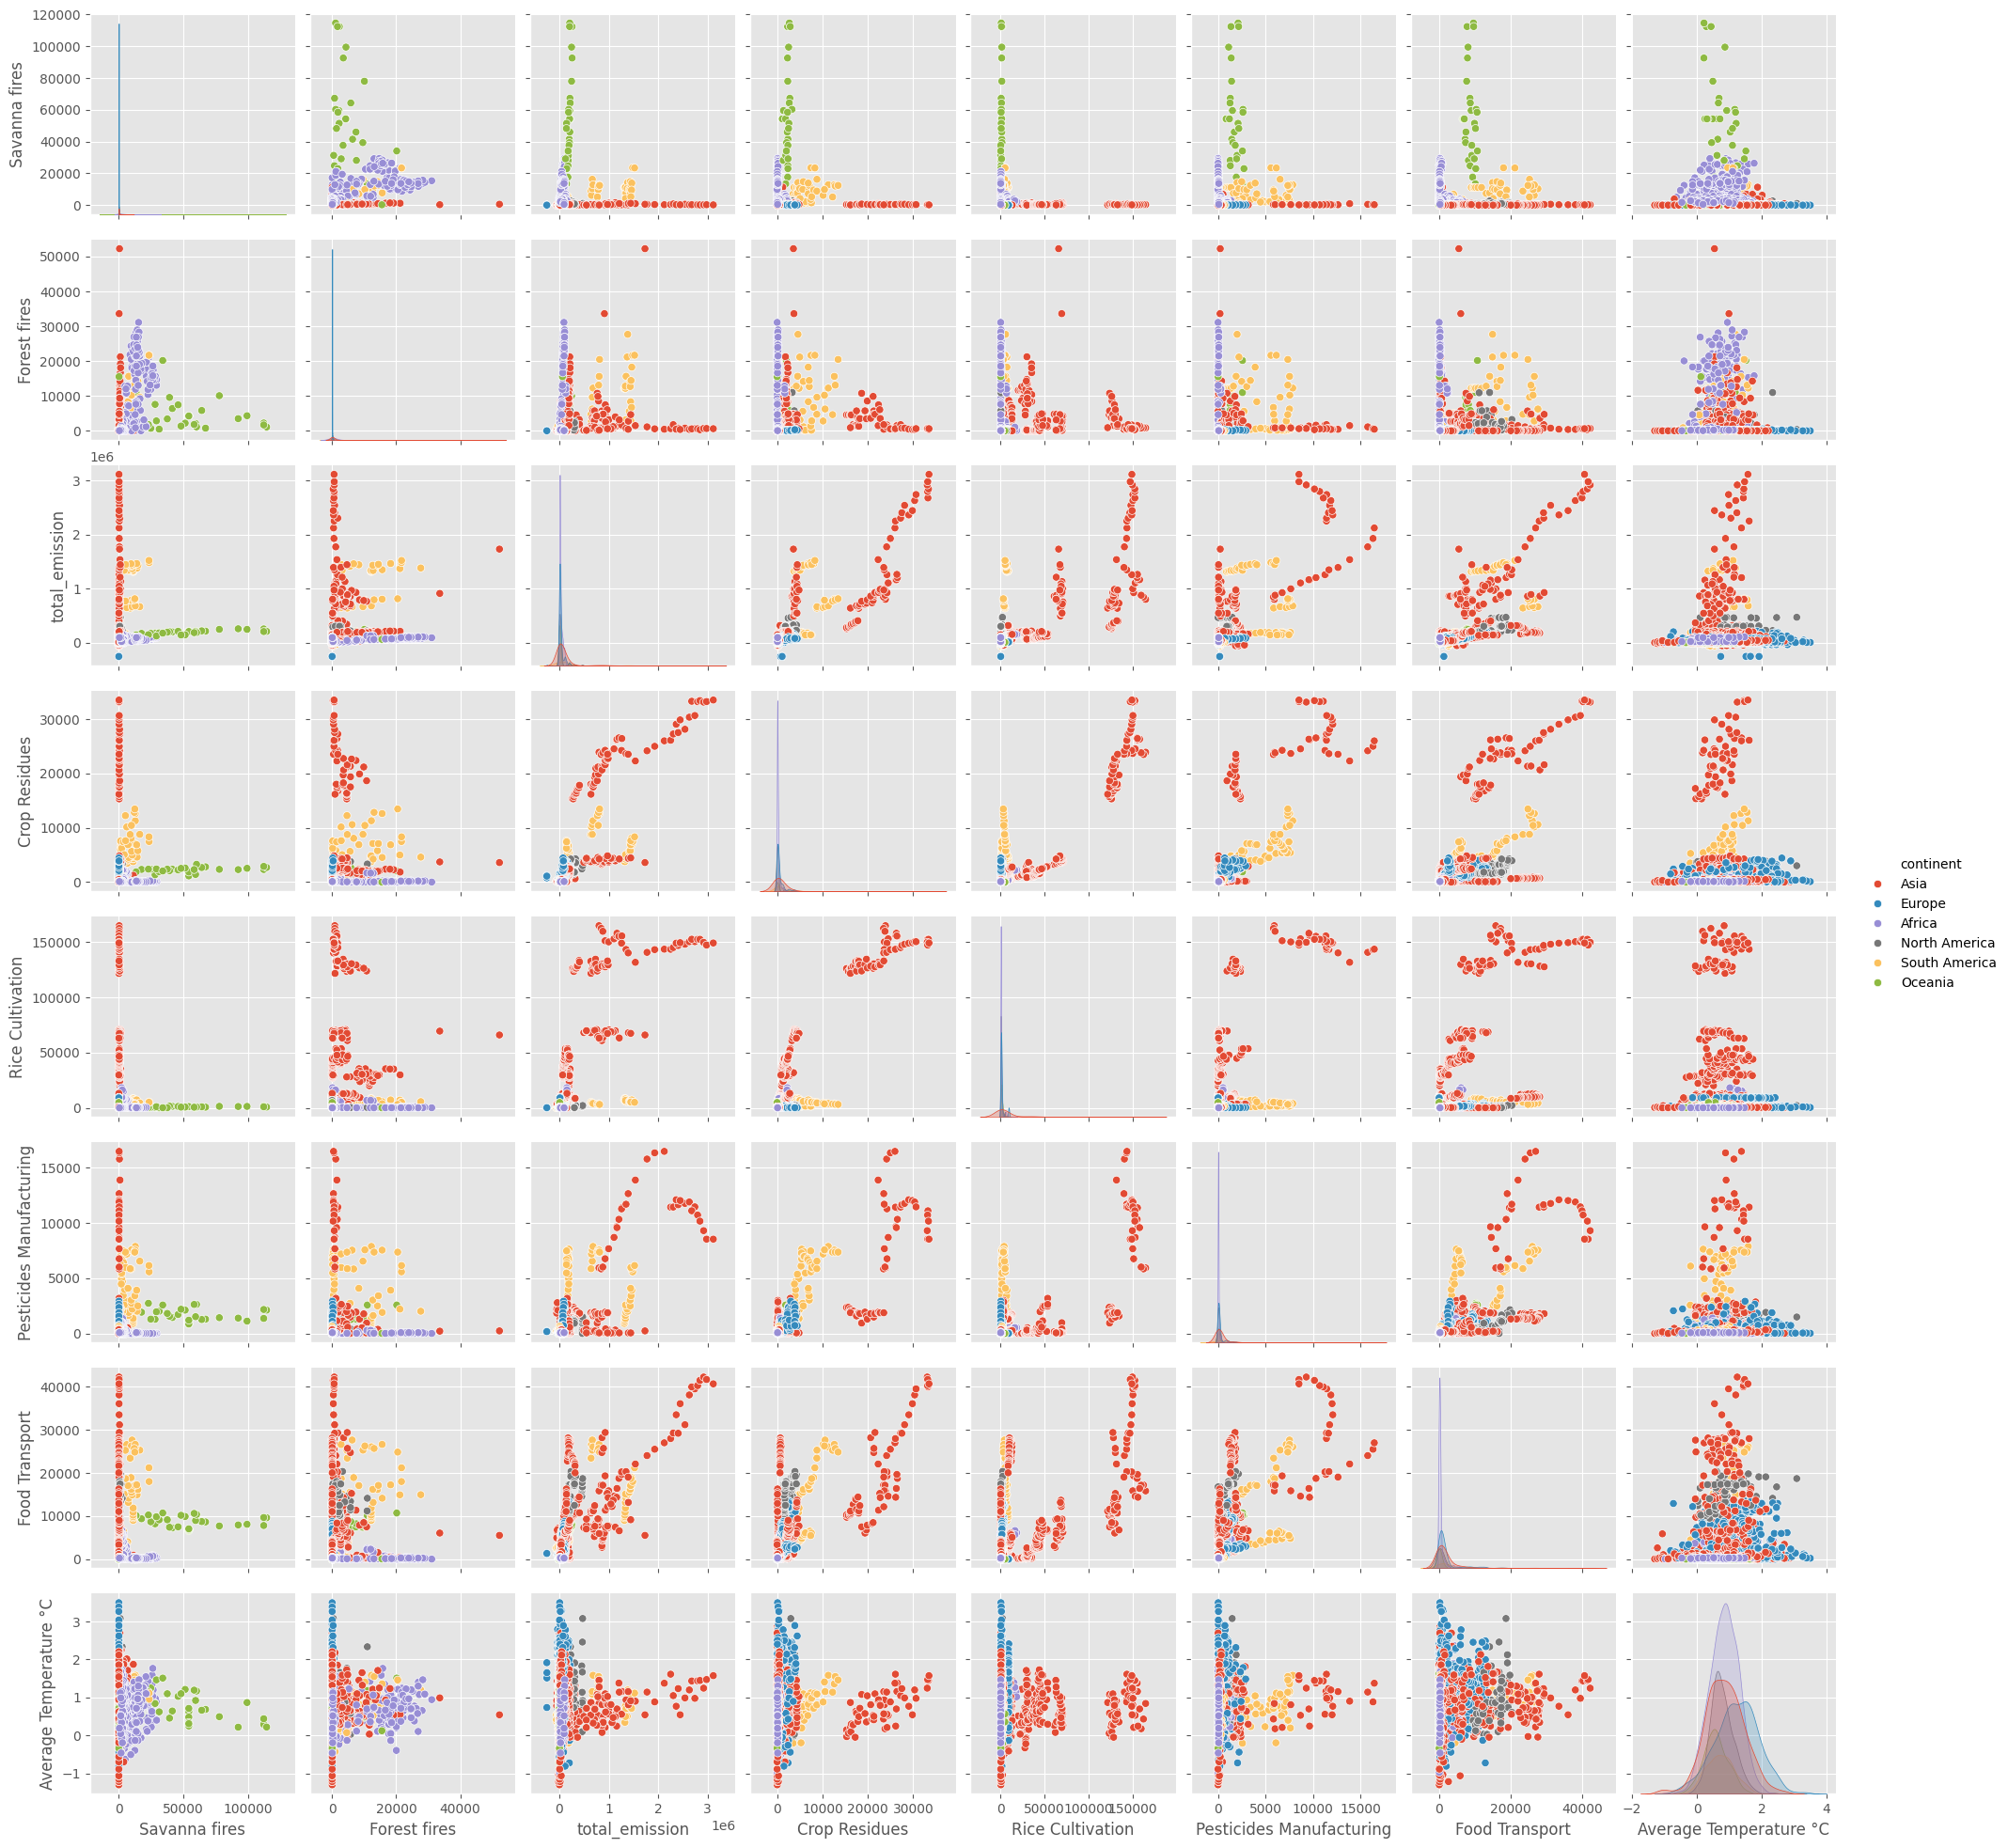

In [26]:
sns.pairplot(df, vars =[
     'Savanna fires', 'Forest fires', 
     "total_emission", 'Crop Residues',
     'Rice Cultivation','Pesticides Manufacturing',
     'Food Transport',"Average Temperature °C"
],
y_vars="Average Temperature °C",
hue = "continent")
plt.show()

In [27]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor

In [28]:
df.isna().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


In [29]:
def regressor_imputer(df, feature, max_depth = 6):
    """ This function replace missing values with
        RanfomForestRegressor forecasting """

    df_filled = df.copy()

    if df_filled[feature].isna().any():
        missing_data = df_filled[df_filled[feature].isna()]
        non_missing_data = df_filled.dropna(subset=[feature])

        X_train = non_missing_data.drop(columns=[feature])
        y_train = non_missing_data[feature]

        imputer = SimpleImputer()
        X_train_imputed = imputer.fit_transform(X_train)
        X_missing = missing_data.drop(columns=[feature])
        X_missing_imputed = imputer.transform(X_missing)

        rf = RandomForestRegressor(max_depth = max_depth)
        rf.fit(X_train_imputed, y_train)

        y_missing_pred = rf.predict(X_missing_imputed)

        df_filled.loc[df_filled[feature].isna(), feature] = y_missing_pred

    return df_filled

In [30]:
num_features = [col for col in df.columns if df[col].dtypes in ["int64", "float64"]]
cat_features = [col for col in df.columns if df[col].dtypes in ["object"]]
# let's create a list with onli missing values feature and the replace them with regression 
missing_values = df[num_features].isna().sum()
missing_list=missing_values[missing_values > 0].keys().tolist()

In [31]:
 numeric_only = df[num_features ]
def replace_missing(df, missing_list):
    numeric_df = df.copy()
    for feature in tqdm(missing_list):
        numeric_df = regressor_imputer(numeric_df, feature)
    return numeric_df

num_df = replace_missing(numeric_only, missing_list)

  0%|          | 0/11 [00:00<?, ?it/s]

In [32]:
cat_df = df[cat_features].copy() 

label_encoder = LabelEncoder()
for column in cat_df.columns:
    cat_df.loc[:, column] = label_encoder.fit_transform(cat_df[column])

In [33]:
final_df = pd.concat([cat_df,num_df], axis =1)
X = final_df.drop(columns =["Average Temperature °C","per_capita_emission_kt"])
y =final_df["Average Temperature °C"]

Model evaluation 

In [38]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
final_df = pd.concat([cat_df,num_df], axis =1)

def df_split(final_df, year = 2016):
    final_df =final_df.copy()
    x_train = final_df.loc[final_df.Year < year]
    y_train = x_train["Average Temperature °C"]
    x_train = x_train.drop(columns ="Average Temperature °C")    

    x_test =final_df.loc[final_df.Year >= year]
    y_test =x_test["Average Temperature °C"]
    x_test = x_test.drop(columns ="Average Temperature °C")        
    return x_train,y_train,x_test,y_test

In [40]:
x_train,y_train,x_test,y_test = df_split(final_df)

In [42]:
# Convert categorical columns to numeric
x_train = pd.get_dummies(x_train, drop_first=True)
x_test = pd.get_dummies(x_test, drop_first=True)

# Make sure both have same columns
x_train, x_test = x_train.align(x_test, join='left', axis=1, fill_value=0)


In [43]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()


In [ ]:
def model_evaluation(x_train, x_test, y_train, y_test):

    models = {
        "LGBMRegressor": LGBMRegressor(),
        "KNeighborsRegressor": KNeighborsRegressor(),
        "RandomForestRegressor": RandomForestRegressor(),
        "GradientBoostingRegressor": GradientBoostingRegressor(),
        "BaggingRegressor": BaggingRegressor(),
        "XGBRegressor": XGBRegressor()
    }

    folds = KFold(n_splits=5, shuffle=True, random_state=42)

    for model_name, model in models.items():

        # Train
        model.fit(x_train, y_train)

        # Prediction
        test_pred = model.predict(x_test)

        # Metrics
        mae = mean_absolute_error(y_test, test_pred)
        mse = mean_squared_error(y_test, test_pred)

        cv_score = cross_val_score(
            model,
            x_train,
            y_train,
            cv=folds,
            scoring="neg_mean_absolute_error"
        ).mean()

        # ✅ Formatted Output
        print(f"{model_name}")
        print(f"MAE: {mae:.4f}")
        print(f"MSE: {mse:.4f}")
        print(f"Cross_val_score {cv_score:.6f}")
        print("-" * 40)


In [ ]:
model_evaluation(x_train, x_test, y_train, y_test)


In [46]:
reg =  RandomForestRegressor()
reg.fit(x_train,y_train)

RandomForestRegressor()

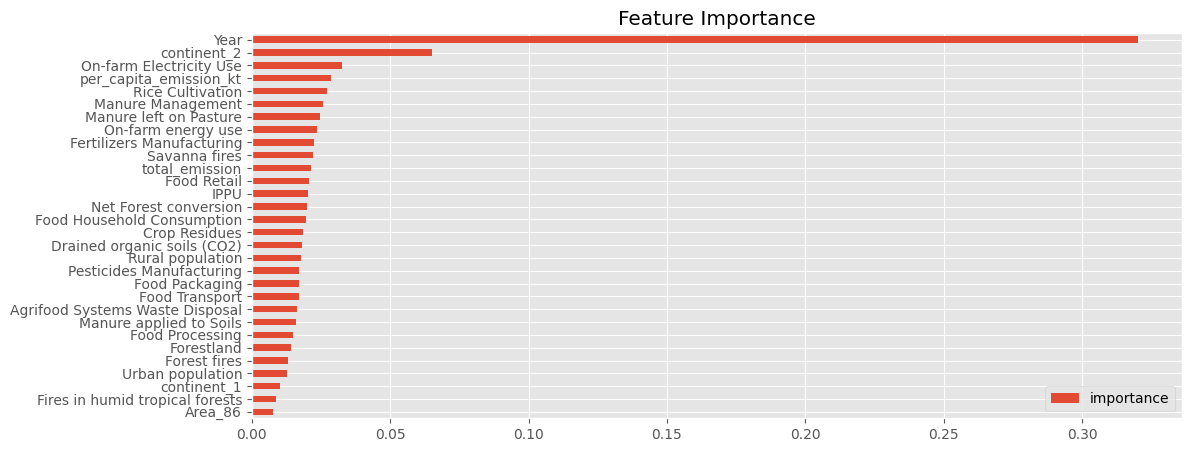

In [54]:
fi = pd.DataFrame(
    data=reg.feature_importances_,
    index=reg.feature_names_in_,
    columns=["importance"]
)

fi = fi.sort_values("importance", ascending=False).head(30)

fi.sort_values("importance").plot(
    kind="barh",
    title="Feature Importance",
    figsize=(12,5)
)

plt.show()
